In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 2
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.3
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[2_10_51_300_0.3_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[2_10_51_300_0.3_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2764248.9891

Best Fitness:	659646.3091
Solution:	200.0000
Diff:		659446.3091

[0:04:03][----------] 1.96% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1560412.7855

Best Fitness:	385940.9545
Solution:	200.0000
Diff:		385740.9545

[0:07:19][----------] 3.92% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2062410.4901

Best Fitness:	248838.7791
Solution:	200.0000
Diff:		248638.7791

[0:10:45][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1634858.6402

Best Fitness:	329991.6774
Solution:	200.0000
Diff:		329791.6774

[0:13:54][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	4311584.7978

Best Fitness:	1121876.4570
Solution:	200.0000
Diff:		1121676.4570

[0:16:53][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2644038.2459

Best Fitness:	645080.0543
Solution:	200.0000
Diff:		644880.0543

[0:20:31][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1639217.3942

Best Fitness:	397064.1272
Solution:	200.0000
Diff:		396864.1272

[0:23:49][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2559145.2419

Best Fitness:	500534.4370
Solution:	200.0000
Diff:		500334.4370

[0:27:02][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2369338.0749

Best Fitness:	586013.1344
Solution:	200.0000
Diff:		585813.1344

[0:30:04][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	3343614.5400

Best Fitness:	410653.3984
Solution:	200.0000
Diff:		410453.3984

[0:33:20][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1905688.0157

Best Fitness:	489794.2668
Solution:	200.0000
Diff:		489594.2668

[0:36:31][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2286497.3035

Best Fitness:	353589.4848
Solution:	200.0000
Diff:		353389.4848

[0:39:26][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2313608.4421

Best Fitness:	526540.7971
Solution:	200.0000
Diff:		526340.7971

[0:42:10][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1626679.6761

Best Fitness:	408382.2653
Solution:	200.0000
Diff:		408182.2653

[0:45:05][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	3657251.1162

Best Fitness:	634008.2542
Solution:	200.0000
Diff:		633808.2542

[0:47:57][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1138297.5631

Best Fitness:	262014.4279
Solution:	200.0000
Diff:		261814.4279

[0:50:44][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	4006507.8173

Best Fitness:	861690.5766
Solution:	200.0000
Diff:		861490.5766

[0:53:38][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	3423891.6650

Best Fitness:	737112.4458
Solution:	200.0000
Diff:		736912.4458

[0:56:36][####------] 35.29% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1718188.4052

Best Fitness:	347859.2372
Solution:	200.0000
Diff:		347659.2372

[0:59:23][####------] 37.25% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1583066.6479

Best Fitness:	388006.8834
Solution:	200.0000
Diff:		387806.8834

[1:02:14][####------] 39.22% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2362623.0147

Best Fitness:	314971.6890
Solution:	200.0000
Diff:		314771.6890

[1:05:06][####------] 41.18% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2382537.8087

Best Fitness:	630415.5828
Solution:	200.0000
Diff:		630215.5828

[1:08:10][####------] 43.14% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1643118.2958

Best Fitness:	320992.3996
Solution:	200.0000
Diff:		320792.3996

[1:11:03][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1969216.0818

Best Fitness:	331249.4897
Solution:	200.0000
Diff:		331049.4897

[1:14:02][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1728314.3303

Best Fitness:	467580.7553
Solution:	200.0000
Diff:		467380.7553

[1:17:02][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	3012370.0276

Best Fitness:	690627.8063
Solution:	200.0000
Diff:		690427.8063

[1:19:41][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2596326.4604

Best Fitness:	547886.9276
Solution:	200.0000
Diff:		547686.9276

[1:22:22][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2922873.3927

Best Fitness:	898398.1825
Solution:	200.0000
Diff:		898198.1825

[1:25:09][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2215513.4477

Best Fitness:	548216.3237
Solution:	200.0000
Diff:		548016.3237

[1:28:09][######----] 56.86% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1469302.4946

Best Fitness:	307549.5013
Solution:	200.0000
Diff:		307349.5013

[1:31:01][######----] 58.82% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1870979.4012

Best Fitness:	389334.0669
Solution:	200.0000
Diff:		389134.0669

[1:33:46][######----] 60.78% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2022256.0467

Best Fitness:	405053.3525
Solution:	200.0000
Diff:		404853.3525

[1:36:26][######----] 62.75% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2642534.5820

Best Fitness:	553098.0620
Solution:	200.0000
Diff:		552898.0620

[1:39:02][######----] 64.71% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	3710047.2111

Best Fitness:	615092.5370
Solution:	200.0000
Diff:		614892.5370

[1:41:45][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	6331159.2157

Best Fitness:	1314890.8618
Solution:	200.0000
Diff:		1314690.8618

[1:44:27][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	3294459.5289

Best Fitness:	416203.8164
Solution:	200.0000
Diff:		416003.8164

[1:47:08][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2083084.9659

Best Fitness:	520628.9074
Solution:	200.0000
Diff:		520428.9074

[1:49:46][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	4169231.5032

Best Fitness:	378222.3201
Solution:	200.0000
Diff:		378022.3201

[1:52:47][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2309931.8562

Best Fitness:	424459.9317
Solution:	200.0000
Diff:		424259.9317

[1:55:38][########--] 76.47% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1092707.9650

Best Fitness:	249735.4764
Solution:	200.0000
Diff:		249535.4764

[1:58:21][########--] 78.43% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2409458.7472

Best Fitness:	575414.9682
Solution:	200.0000
Diff:		575214.9682

[2:00:52][########--] 80.39% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2369668.6815

Best Fitness:	624562.2620
Solution:	200.0000
Diff:		624362.2620

[2:03:28][########--] 82.35% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	3359205.8648

Best Fitness:	670531.8686
Solution:	200.0000
Diff:		670331.8686

[2:06:09][########--] 84.31% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2481720.9070

Best Fitness:	576216.4761
Solution:	200.0000
Diff:		576016.4761

[2:08:54][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2143880.2603

Best Fitness:	601001.1779
Solution:	200.0000
Diff:		600801.1779

[2:11:34][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1396903.3385

Best Fitness:	401703.3159
Solution:	200.0000
Diff:		401503.3159

[2:14:24][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	3512193.5278

Best Fitness:	693203.5304
Solution:	200.0000
Diff:		693003.5304

[2:17:08][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1147362.1888

Best Fitness:	255922.6062
Solution:	200.0000
Diff:		255722.6062

[2:19:46][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2711790.8734

Best Fitness:	525915.5639
Solution:	200.0000
Diff:		525715.5639

[2:22:26][##########] 96.08% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1840110.6869

Best Fitness:	290800.2156
Solution:	200.0000
Diff:		290600.2156

[2:25:15][##########] 98.04% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	2050364.8224

Best Fitness:	480681.6955
Solution:	200.0000
Diff:		480481.6955

[2:28:01][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:28:01

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
93,3.871631e+06,3.681391e+06,2.912496e+06,4.110096e+06,3.437759e+06,3.640747e+06,3.628405e+06,2.522605e+06,2.667257e+06,3.502181e+06,...,1.170535e+06,2.639112e+06,2.667491e+06,3.979221e+06,1.480828e+06,3.236775e+06,4.952766e+06,2.596382e+06,3.932623e+06,50
94,3.871631e+06,3.681391e+06,1.120154e+06,4.110096e+06,3.437759e+06,1.319453e+06,3.628405e+06,2.522605e+06,2.231856e+06,3.502181e+06,...,1.170535e+06,1.747523e+06,2.667491e+06,3.979221e+06,1.480828e+06,1.718702e+06,4.244801e+06,2.596382e+06,3.932623e+06,50
95,3.871631e+06,3.681391e+06,1.120154e+06,4.110096e+06,3.437759e+06,1.319453e+06,3.521051e+06,2.522605e+06,2.231856e+06,1.925829e+06,...,1.170535e+06,1.747523e+06,2.667491e+06,3.979221e+06,1.480828e+06,1.718702e+06,3.393604e+06,2.596382e+06,3.932623e+06,50
96,3.638256e+06,3.528308e+06,1.120154e+06,2.745861e+06,3.437759e+06,1.319453e+06,3.521051e+06,1.803457e+06,2.231856e+06,1.925829e+06,...,1.170535e+06,1.747523e+06,2.667491e+06,1.795021e+06,1.480828e+06,1.718702e+06,3.393604e+06,2.596382e+06,1.931823e+06,50
97,3.638256e+06,2.408470e+06,1.120154e+06,2.396497e+06,3.437759e+06,1.319453e+06,3.521051e+06,1.803457e+06,2.154519e+06,1.925829e+06,...,1.170535e+06,1.666575e+06,2.667491e+06,1.795021e+06,1.480828e+06,1.718702e+06,3.393604e+06,2.596382e+06,1.931823e+06,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 659446.309136193

Best error for run 1: 385740.95449628605

Best error for run 2: 248638.77913404896

Best error for run 3: 329791.677361711

Best error for run 4: 1121676.4570268467

Best error for run 5: 644880.0543304296

Best error for run 6: 396864.12719718623

Best error for run 7: 500334.436955358

Best error for run 8: 585813.1343953431

Best error for run 9: 410453.3984187441

Best error for run 10: 489594.2668491532

Best error for run 11: 353389.484849099

Best error for run 12: 526340.7971261234

Best error for run 13: 408182.2653268566

Best error for run 14: 633808.2541545857

Best error for run 15: 261814.42791242406

Best error for run 16: 861490.5765663163

Best error for run 17: 736912.4458238018

Best error for run 18: 347659.2372279314

Best error for run 19: 387806.88341019244

Best error for run 20: 314771.688989176

Best error for run 21: 630215.5828185575

Best error for run 22: 320792.3995962591

Best error for run 23: 331049.48968391016

Best error for run 24: 467380.75532835873

Best error for run 25: 690427.8062654117

Best error for run 26: 547686.9275589371

Best error for run 27: 898198.182526202

Best error for run 28: 548016.323650451

Best error for run 29: 307349.50126314815

Best error for run 30: 389134.0668951108

Best error for run 31: 404853.3524917509

Best error for run 32: 552898.0619740257

Best error for run 33: 614892.5369885529

Best error for run 34: 1314690.8618436262

Best error for run 35: 416003.8164076598

Best error for run 36: 520428.907377516

Best error for run 37: 378022.32010398456

Best error for run 38: 424259.9316930012

Best error for run 39: 249535.47642367883

Best error for run 40: 575214.9681948903

Best error for run 41: 624362.2619667106

Best error for run 42: 670331.868648302

Best error for run 43: 576016.4761492311

Best error for run 44: 600801.1779165629

Best error for run 45: 401503.3158874937

Best error for run 46: 693003.5304254731

Best error for run 47: 255722.60618912

Best error for run 48: 525715.5638763048

Best error for run 49: 290600.21555357956

Best error for run 50: 480481.69547623064

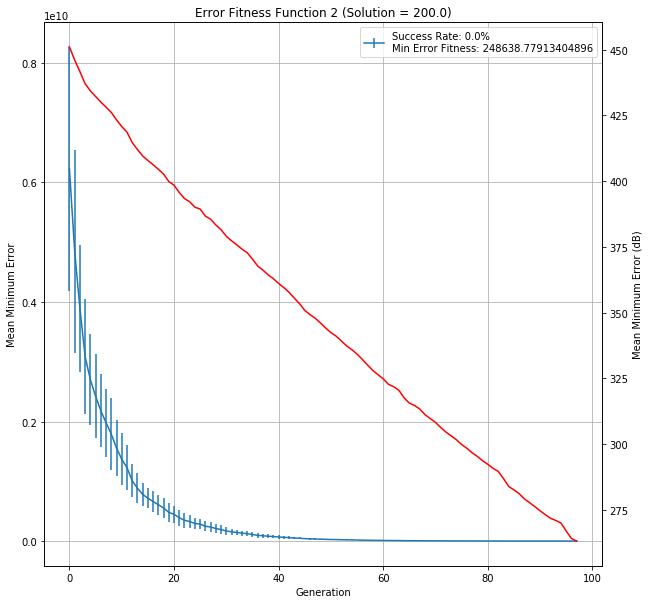

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[2_10_51_300_0.3_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,2,10,0.3,659446.309136,385740.954496,248638.779134,329791.677362,1.121676e+06,644880.05433,...,600801.177917,401503.315887,693003.530425,255722.606189,525715.563876,290600.215554,480481.695476,515784.306625,2:28:01,30000
